# Instruction Latency with All Techniques

In [1]:
from __future__ import print_function
import glob
import matplotlib
import cStringIO
rc_fonts = {
    "font.weight": 800,
    "font.family": "serif",
    "font.serif": ["Times"], # use latex's default
    "font.sans-serif": ["DejaVu Sans"],
    "text.usetex": True,
}
matplotlib.rcParams.update(rc_fonts)
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.optimize

from rmexp import dbutils, schema
from rmexp.schema import models
from rmexp import analysis
import cPickle as pickle

In [3]:
def get_delays_per_app(exp, app):
    print("--------------{}----------".format(exp))
    delay_infos = analysis.get_exp_app_inst_delay(exp, app)
    avg_delay_per_client = {k: np.nan_to_num(np.mean(v[1])) for k, v in delay_infos.items()}
    print(avg_delay_per_client)
    avg_delay = np.mean([v for k, v in avg_delay_per_client.items()])
    print(avg_delay)
    flatten_delays = []
    map(lambda x: flatten_delays.extend(x[1][1]), delay_infos.items())
    return flatten_delays

apps = ['lego', 'pingpong', 'pool', 'face']
# apps = ['face']
exps = [4, 6, 8]
data = {}
for app in apps:
    print("==========={}===========".format(app))
    data[app] = {}
    for exp_idx, exp in enumerate(exps):
        bn = 'sec6-baseline-{}'.format(exp)
        on = 'sec6-ours-{}'.format(exp)
        delay_baseline = get_delays_per_app(bn, app)
        delay_ours = get_delays_per_app(on, app)
        data[app][bn] = delay_baseline
        data[app][on] = delay_ours
with open('sec6-inst-latency.pkl', 'wb') as f:
    pickle.dump(data, f, protocol=pickle.HIGHEST_PROTOCOL)

===========lego===========
--------------sec6-baseline-4----------
{'13': 3280.3333333333335, '12': 6106.0, '15': 3714.5, '14': 4433.0}
4383.458333333334
--------------sec6-ours-4----------
{'13': 4269.333333333333, '12': 1866.0, '15': 10034.5, '14': 2221.0}
4597.708333333333
--------------sec6-baseline-6----------
{'20': 4117.0, '21': 4725.0, '22': 5081.0, '23': 4605.5, '19': 3186.5, '18': 5118.0}
4472.166666666667
--------------sec6-ours-6----------
{'20': 1828.0, '21': 2593.0, '22': 4488.0, '23': 5351.8, '19': 5217.333333333333, '18': 3768.0}
3874.3555555555554
--------------sec6-baseline-8----------


/home/junjuew/work/resource-management/conda-env-rmexp/lib/python2.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/junjuew/work/resource-management/conda-env-rmexp/lib/python2.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


{'24': 8333.0, '25': 6708.0, '26': 6122.0, '27': 5789.0, '31': 0.0, '30': 5209.0, '28': 0.0, '29': 5858.5}
4752.4375
--------------sec6-ours-8----------
{'24': 0.0, '25': 6050.0, '26': 6591.0, '27': 0.0, '31': 0.0, '30': 0.0, '28': 0.0, '29': 0.0}
1580.125
===========pingpong===========
--------------sec6-baseline-4----------
{'11': 308.5, '10': 449.0, '9': 371.0, '8': 317.2}
361.425
--------------sec6-ours-4----------
{'11': 140.53333333333333, '10': 126.4375, '9': 128.0, '8': 137.58333333333334}
133.13854166666667
--------------sec6-baseline-6----------
{'13': 329.0, '12': 214.0, '15': 0.0, '14': 0.0, '17': 0.0, '16': 0.0}
90.5
--------------sec6-ours-6----------
{'13': 113.83333333333333, '12': 116.52631578947368, '15': 109.95, '14': 106.22222222222223, '17': 106.81481481481481, '16': 102.46666666666667}
109.30222547108512
--------------sec6-baseline-8----------
{'20': 0.0, '21': 256.0, '17': 0.0, '16': 0.0, '19': 0.0, '18': 0.0, '23': 0.0, '22': 716.0}
121.5
--------------sec6-ours

In [17]:
from pylab import plot, show, savefig, xlim, figure, \
                hold, ylim, legend, boxplot, setp, axes

# function for setting the colors of the box plots pairs
def setBoxColors(bp):
    setp(bp['boxes'][0], color='blue')
    setp(bp['caps'][0], color='blue')
    setp(bp['caps'][1], color='blue')
    setp(bp['whiskers'][0], color='blue')
    setp(bp['whiskers'][1], color='blue')
#     setp(bp['fliers'][0], color='blue')
#     setp(bp['fliers'][1], color='blue')
    setp(bp['medians'][0], color='blue')

    setp(bp['boxes'][1], color='red')
    setp(bp['caps'][2], color='red')
    setp(bp['caps'][3], color='red')
    setp(bp['whiskers'][2], color='red')
    setp(bp['whiskers'][3], color='red')
#     setp(bp['fliers'][2], color='red')
#     setp(bp['fliers'][3], color='red')
    setp(bp['medians'][1], color='red')

===========lego===========


<IPython.core.display.Javascript object>


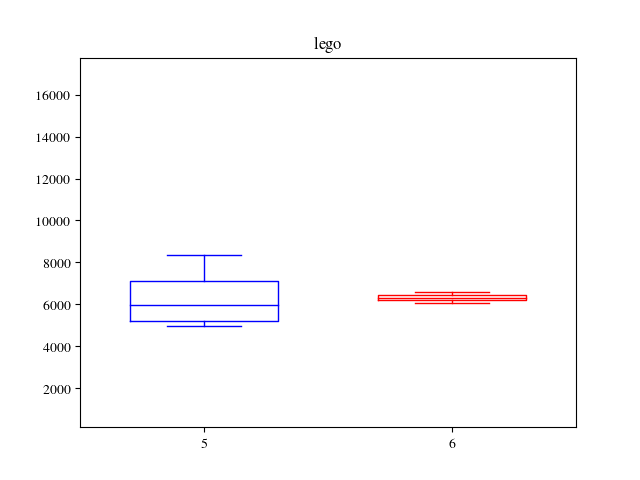

--------------sec6-baseline-4----------
{'13': 3280.3333333333335, '12': 6106.0, '15': 3714.5, '14': 4433.0}
4383.458333333334
--------------sec6-ours-4----------
{'13': 4269.333333333333, '12': 1866.0, '15': 10034.5, '14': 2221.0}
4597.708333333333
[1593.0, 3939.0, 4309.0, 4769.0, 7443.0, 3641.0, 3788.0, 4433.0]
[927.0, 1489.0, 2362.0, 1388.0, 2688.0, 16762.0, 1266.0, 2466.0, 16979.0, 3090.0, 1394.0, 1079.0, 4190.0]
--------------sec6-baseline-6----------
{'20': 4117.0, '21': 4725.0, '22': 5081.0, '23': 4605.5, '19': 3186.5, '18': 5118.0}
4472.166666666667
--------------sec6-ours-6----------
{'20': 1828.0, '21': 2593.0, '22': 4488.0, '23': 5351.8, '19': 5217.333333333333, '18': 3768.0}
3874.3555555555554
[4117.0, 4610.0, 4840.0, 5081.0, 5208.0, 4003.0, 1468.0, 4905.0, 5118.0]
[1828.0, 2100.0, 3086.0, 4488.0, 3247.0, 2526.0, 15980.0, 3051.0, 1955.0, 2841.0, 3795.0, 2781.0, 2717.0, 3482.0, 15688.0, 3768.0]
--------------sec6-baseline-8----------
{'24': 8333.0, '25': 6708.0, '26': 6122.0

<IPython.core.display.Javascript object>


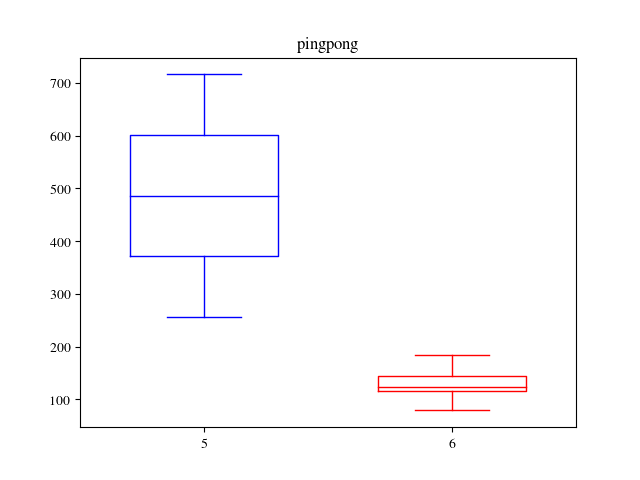

--------------sec6-baseline-4----------
{'11': 308.5, '10': 449.0, '9': 371.0, '8': 317.2}
361.425
--------------sec6-ours-4----------
{'11': 140.53333333333333, '10': 126.4375, '9': 128.0, '8': 137.58333333333334}
133.13854166666667
[501.0, 475.0, 157.0, 101.0, 333.0, 565.0, 145.0, 597.0, 482.0, 584.0, 187.0, 227.0, 106.0]
[129.0, 161.0, 148.0, 148.0, 113.0, 105.0, 105.0, 146.0, 98.0, 139.0, 149.0, 159.0, 188.0, 174.0, 146.0, 183.0, 140.0, 137.0, 94.0, 199.0, 132.0, 124.0, 135.0, 126.0, 103.0, 113.0, 96.0, 156.0, 88.0, 114.0, 83.0, 155.0, 168.0, 169.0, 98.0, 107.0, 103.0, 102.0, 163.0, 82.0, 133.0, 114.0, 110.0, 147.0, 132.0, 236.0, 120.0, 143.0, 111.0, 94.0, 105.0, 255.0, 84.0]
--------------sec6-baseline-6----------
{'13': 329.0, '12': 214.0, '15': 0.0, '14': 0.0, '17': 0.0, '16': 0.0}
90.5
--------------sec6-ours-6----------
{'13': 113.83333333333333, '12': 116.52631578947368, '15': 109.95, '14': 106.22222222222223, '17': 106.81481481481481, '16': 102.46666666666667}
109.3022254710

<IPython.core.display.Javascript object>


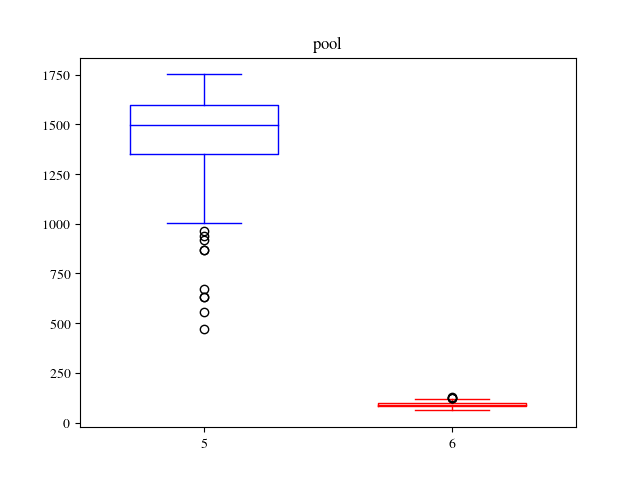

--------------sec6-baseline-4----------
{'5': 772.75, '4': 781.7142857142857, '7': 609.0576923076923, '6': 801.2272727272727}
741.1873126873127
--------------sec6-ours-4----------
{'5': 137.57142857142858, '4': 119.23404255319149}
128.40273556231003
[715.0, 883.0, 883.0, 887.0, 894.0, 828.0, 749.0, 343.0, 502.0, 775.0, 746.0, 825.0, 749.0, 775.0, 776.0, 841.0, 833.0, 910.0, 777.0, 828.0, 698.0, 909.0, 74.0, 97.0, 468.0, 78.0, 103.0, 79.0, 440.0, 113.0, 91.0, 104.0, 83.0, 72.0, 84.0, 113.0, 110.0, 546.0, 766.0, 655.0, 832.0, 984.0, 693.0, 763.0, 715.0, 912.0, 932.0, 806.0, 468.0, 754.0, 860.0, 840.0, 887.0, 737.0, 768.0, 811.0, 882.0, 874.0, 868.0, 829.0, 824.0, 712.0, 440.0, 860.0, 840.0, 897.0, 852.0, 826.0, 840.0, 793.0, 809.0, 907.0, 826.0, 954.0, 837.0, 744.0, 764.0, 843.0, 867.0, 792.0, 866.0, 727.0, 715.0, 682.0, 762.0, 973.0, 769.0, 769.0, 786.0, 802.0, 852.0, 817.0, 815.0, 834.0, 789.0, 822.0]
[205.0, 72.0, 69.0, 92.0, 136.0, 103.0, 100.0, 165.0, 155.0, 76.0, 119.0, 180.0, 233.

<IPython.core.display.Javascript object>


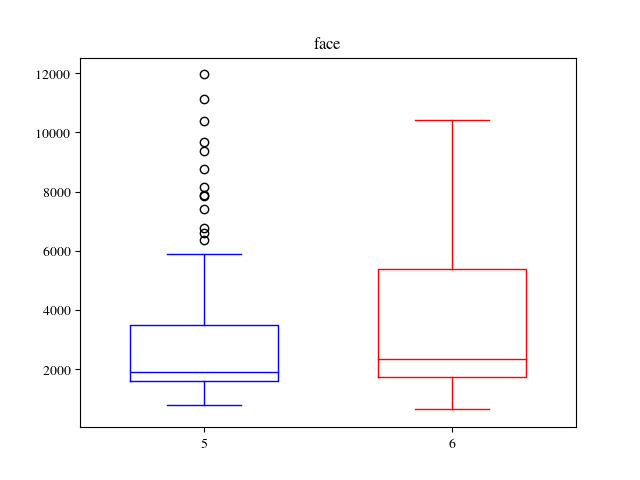

--------------sec6-baseline-4----------
{'1': 1041.2857142857142, '0': 1273.2608695652175, '3': 1076.7, '2': 1002.1428571428571}
1098.347360248447
--------------sec6-ours-4----------
{'1': 908.25, '0': 1519.076923076923, '3': 934.1666666666666, '2': 1092.3157894736842}
1113.4523448043183
[762.0, 1028.0, 872.0, 1026.0, 1368.0, 1077.0, 1156.0, 1182.0, 1357.0, 1037.0, 1087.0, 1141.0, 1046.0, 2026.0, 1128.0, 2184.0, 764.0, 1264.0, 1418.0, 1157.0, 863.0, 1250.0, 1065.0, 2731.0, 676.0, 1177.0, 1791.0, 1091.0, 1056.0, 794.0, 1229.0, 1030.0, 971.0, 1186.0, 1039.0, 1150.0, 1167.0, 1000.0, 1085.0, 910.0, 1235.0, 1022.0, 1084.0, 1368.0, 1200.0, 1078.0, 981.0, 995.0, 1015.0, 786.0, 1032.0, 947.0, 607.0, 680.0]
[947.0, 1079.0, 991.0, 832.0, 998.0, 640.0, 690.0, 1042.0, 1046.0, 1400.0, 632.0, 602.0, 1430.0, 2009.0, 854.0, 1749.0, 2710.0, 794.0, 896.0, 1605.0, 794.0, 1391.0, 3062.0, 1429.0, 1025.0, 885.0, 1282.0, 839.0, 923.0, 895.0, 781.0, 821.0, 985.0, 1089.0, 1067.0, 1068.0, 1054.0, 919.0, 889.0, 

In [18]:
%matplotlib notebook


# # second boxplot pair
# bp = boxplot(B, positions = [4, 5], widths = 0.6)
# setBoxColors(bp)

# # thrid boxplot pair
# bp = boxplot(C, positions = [7, 8], widths = 0.6)
# setBoxColors(bp)

# # draw temporary red and blue lines and use them to create a legend
# hB, = plot([1,1],'b-')
# hR, = plot([1,1],'r-')
# legend((hB, hR),('Apples', 'Oranges'))
# hB.set_visible(False)
# hR.set_visible(False)


apps = ['lego', 'pingpong', 'pool', 'face']
exps = [4, 6, 8]
for app in apps:
    print("==========={}===========".format(app))
    plt.figure()
    for exp_idx, exp in enumerate(exps):
        delay_baseline = get_delays_per_app('sec6-baseline-{}'.format(exp), app)
        delay_ours = get_delays_per_app('sec6-ours-{}'.format(exp), app)
        print(delay_baseline)
        print(delay_ours)
        # first boxplot pair
        bp = boxplot([delay_baseline, delay_ours], positions = [2*exp_idx+1, 2*exp_idx+2], widths = 0.6)
        setBoxColors(bp)
        
    plt.title(app)